<a href="https://colab.research.google.com/github/NIKK-666/AI-hackfest/blob/main/Cybersecurity_Threat_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic ML + Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import joblib


In [ ]:


df = pd.read_csv("/content/Data/Tuesday-WorkingHours.pcap_ISCX.csv")  # replace with actual filename
# Shape of dataset
print("Shape:", df.shape)

# Preview
display(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Label distribution
print("\nLabel distribution:")
print(df[' Label'].value_counts())

Shape: (445909, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



Missing values per column:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

Label distribution:
 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64


In [ ]:
# Drop rows with NaN
df = df.dropna()

# Encode target label
le = LabelEncoder()
df[' Label'] = le.fit_transform(df[' Label'])

# Separate features & labels
X = df.drop(columns=[' Label'])
y = df[' Label']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (445708, 78)
Target shape: (445708,)


In [ ]:
# @title Default title text
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso.fit(X_train)

# Predict (IsolationForest returns -1 for anomaly, 1 for normal)
y_pred = iso.predict(X_test)

# Convert predictions: -1 -> 1 (attack), 1 -> 0 (benign)
y_pred = [0 if p == 1 else 1 for p in y_pred]

# Convert y_test to binary labels: 0 (Benign) and 1 (Attack)
y_test_binary = [0 if label == 0 else 1 for label in y_test]


print(classification_report(y_test_binary, y_pred, target_names=['Benign','Attack']))

              precision    recall  f1-score   support

      Benign       0.97      0.90      0.93    129532
      Attack       0.00      0.00      0.00      4181

    accuracy                           0.87    133713
   macro avg       0.48      0.45      0.47    133713
weighted avg       0.94      0.87      0.90    133713



              precision    recall  f1-score   support

      Benign       0.97      0.90      0.93    129532
      Attack       0.00      0.00      0.00      4181

    accuracy                           0.87    133713
   macro avg       0.48      0.45      0.47    133713
weighted avg       0.94      0.87      0.90    133713



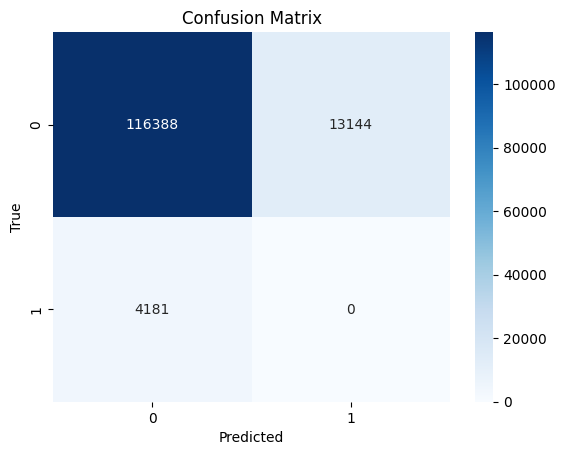

ROC-AUC: 0.4492635024549918


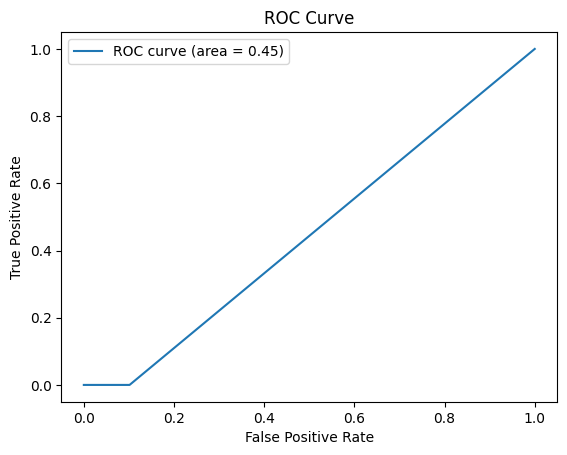

In [ ]:
if y_test_binary is not None:
    # Classification report
    print(classification_report(y_test_binary, y_pred, target_names=['Benign','Attack']))

    # Confusion Matrix
    cm = confusion_matrix(y_test_binary, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC-AUC Score
    roc_score = roc_auc_score(y_test_binary, y_pred)
    print("ROC-AUC:", roc_score)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_score:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curve")
    plt.show()

In [ ]:
joblib.dump(iso, "cyber_model.pkl")
files.download("cyber_model.pkl")  # to download model locally


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>